# Images Visualization

## Imports

In [1]:
import os
import random

import pandas as pd
from skimage import exposure

from lib.plot_utils import show_images
from lib.image_processing import load_numpy_data

## Config

In [2]:
# Path to the folder with the subjects folders extracted
subjects_path = "../../../datasets/BIMCV-COVID19-cIter_1_2/covid19_posi/"

# Path to the TSV with all the images file pahts by subject and session
partitions_tsv_path = os.path.join(subjects_path, "derivatives/partitions.tsv")

## Load CSV data

In [3]:
# Load dataframe with all the images by session and subject
cols = ["subject", "session", "filepath"]  # The original columns must be fixed
part_df = pd.read_csv(partitions_tsv_path, sep="\t", header=0, names=cols)

part_df.head()

,subject,session,filepath
0,sub-S03044,ses-E06138,./sub-S03044/ses-E06138/mod-rx/sub-S03044_ses-...
1,sub-S03044,ses-E06790,./sub-S03044/ses-E06790/mod-rx/sub-S03044_ses-...
2,sub-S03044,ses-E07712,./sub-S03044/ses-E07712/mod-rx/sub-S03044_ses-...
3,sub-S03045,ses-E06139,./sub-S03045/ses-E06139/mod-rx/sub-S03045_ses-...
4,sub-S03045,ses-E06910,./sub-S03045/ses-E06910/mod-rx/sub-S03045_ses-...


## Show random images

The next cell takes N random images (with view AP or PA) and shows them in a grid.

Images to show:
./sub-S11102/ses-E24204/mod-rx/sub-S11102_ses-E24204_run-1_bp-chest_vp-ap_dx.png
./sub-S10941/ses-E23605/mod-rx/sub-S10941_ses-E23605_run-1_bp-chest_vp-pa_dx.png
./sub-S10409/ses-E20887/mod-rx/sub-S10409_ses-E20887_run-1_bp-chest_vp-ap_dx.png
./sub-S12534/ses-E25418/mod-rx/sub-S12534_ses-E25418_run-1_bp-chest_vp-pa_dx.png


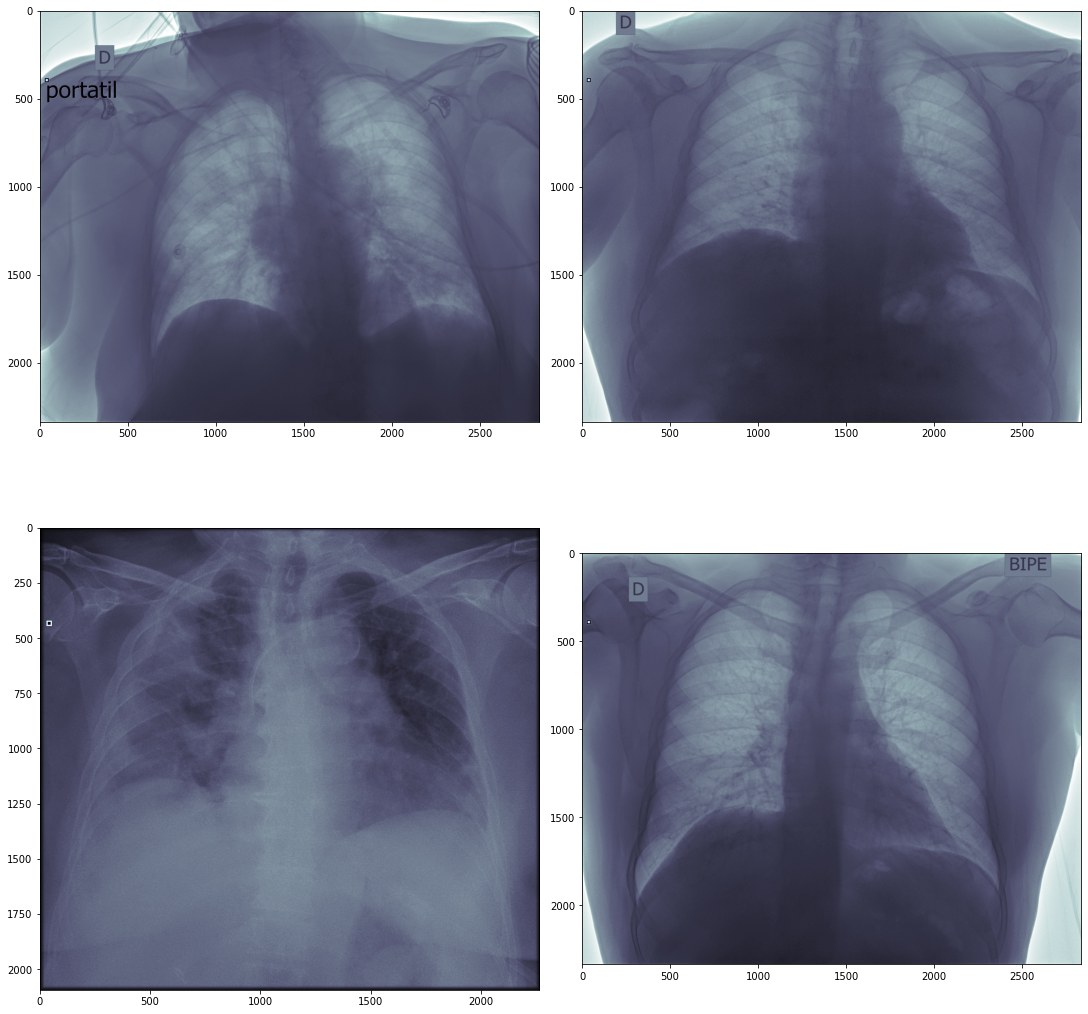

In [4]:
N = 4  # Number of images to show

# Get only AP/PA images
ap_pa_paths = [path for path in part_df["filepath"] if "vp-ap" in path or "vp-pa" in path]

# Get random images
sampled_imgs = random.sample(ap_pa_paths, N)
print("Images to show:")
for img in sampled_imgs:
    print(img)

# Get the full path. "img_paths" are relative to the main data folder
img_paths = [os.path.join(subjects_path, f) for f in sampled_imgs]

# Load the images to plot
img_arrs = [load_numpy_data(f_path) for f_path in img_paths]

# Plot the images grid
show_images(img_arrs, grid_width=15, grid_height=15)

## Show images after equalization

Now we take the images selected in the previous cell and we apply a histogram equalization to improve the contrast.

/home/chavicoski/anaconda3/envs/pyeddl/lib/python3.8/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 26550 fits in uint16
  return _convert(image, np.uint16, force_copy)
/home/chavicoski/anaconda3/envs/pyeddl/lib/python3.8/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 26775 fits in uint16
  return _convert(image, np.uint16, force_copy)
/home/chavicoski/anaconda3/envs/pyeddl/lib/python3.8/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 4095 fits in uint16
  return _convert(image, np.uint16, force_copy)
/home/chavicoski/anaconda3/envs/pyeddl/lib/python3.8/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 26533 fits in uint16
  return _convert(image, np.uint16, force_copy)


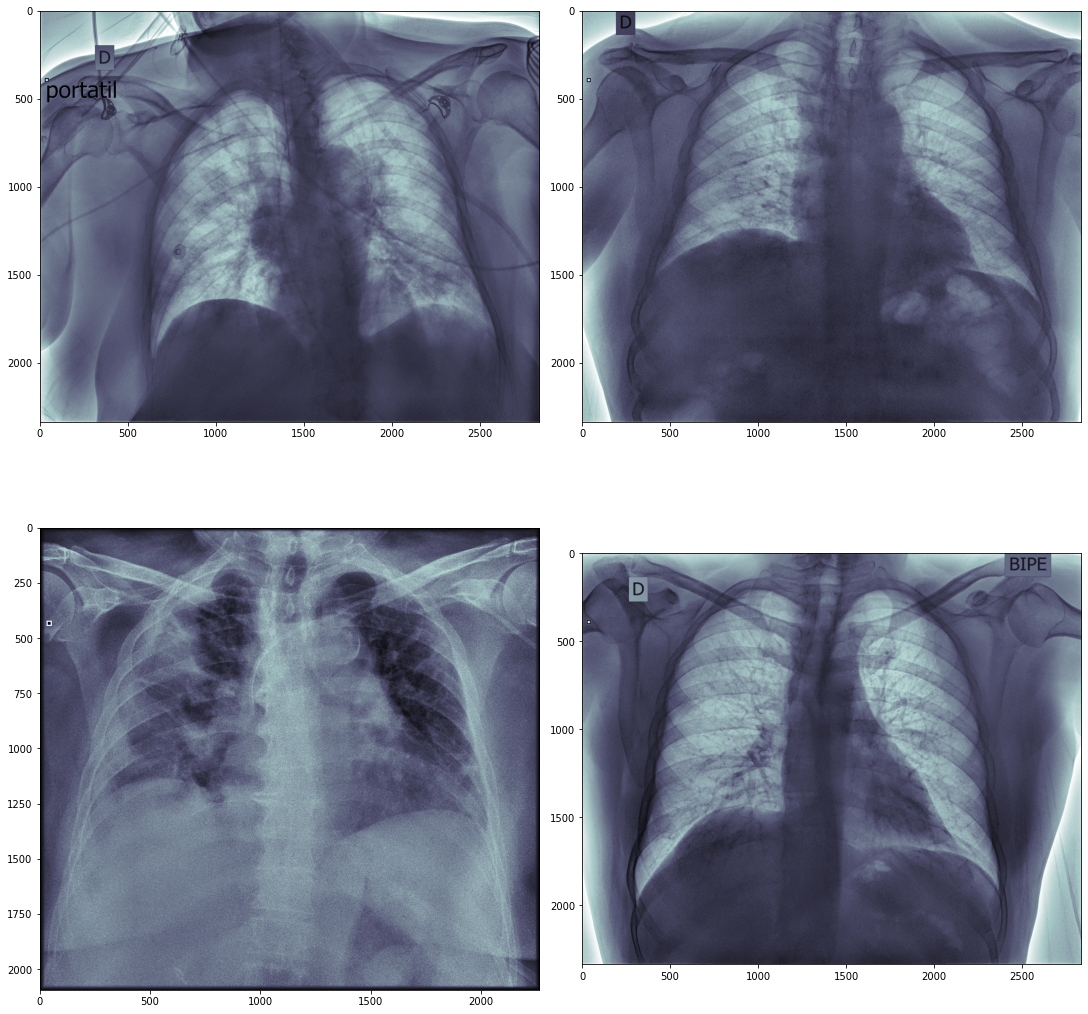

In [5]:
# Select equalization mode
#  - Note: More info in: https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html
#eq_func = exposure.equalize_hist  # histogram equalization
eq_func = exposure.equalize_adapthist  # Adaptive equalization

# Equalize previously loaded images
eq_imgs = [eq_func(img) for img in img_arrs]

# Plot the images grid
show_images(eq_imgs, grid_width=15, grid_height=15)

## Show a specific images

### Select the images to show

If you only set the "sub_id" all the images from all the session of that subject will be shown. And if you set the "sess_id" all the images from that session will be shown.

In [22]:
# Use the empty string ("") to delete a field
sub_id = ""
sess_id = "ses-E25558"

select_only_ap_pa = True  # To show only the anterior-posterior and posterior-anterior images

### Show the images selected

Images to show:
./sub-S12367/ses-E25558/mod-rx/sub-S12367_ses-E25558_run-1_bp-chest_vp-ap_dx.png


/home/chavicoski/anaconda3/envs/pyeddl/lib/python3.8/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 26541 fits in uint16
  return _convert(image, np.uint16, force_copy)


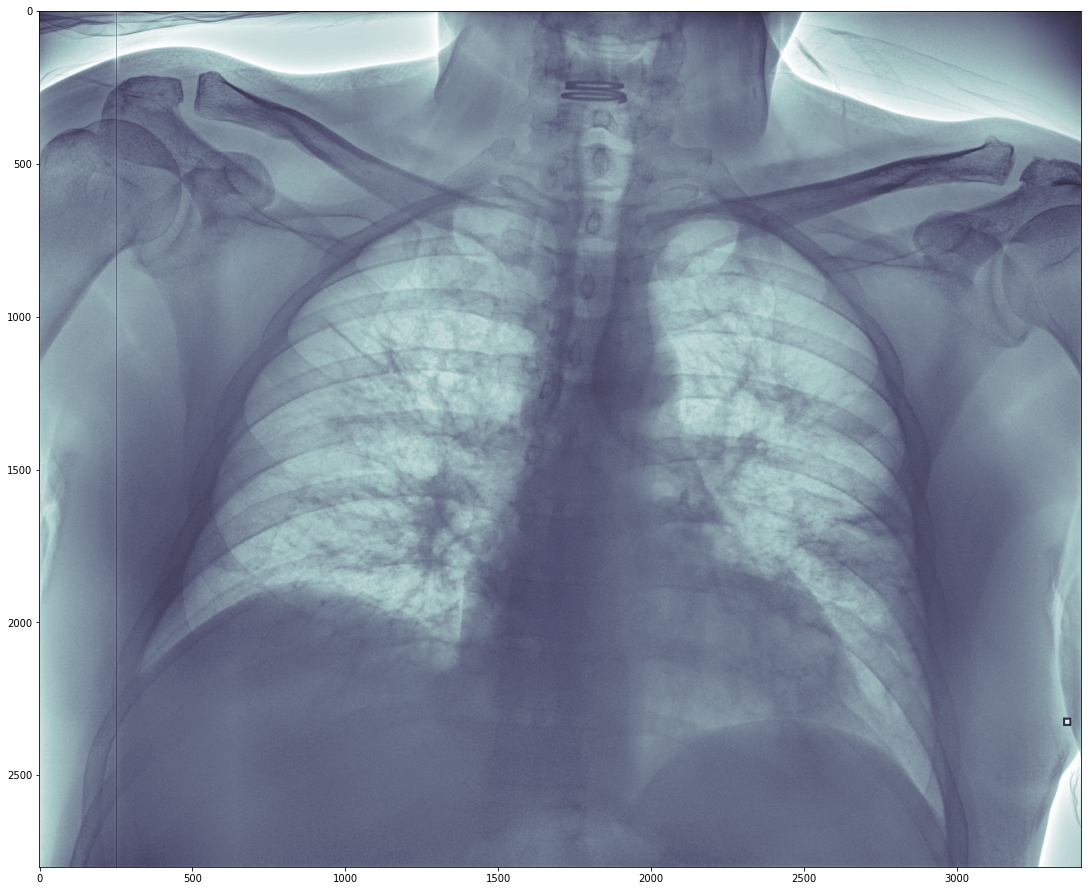

In [23]:
# Get the file paths of the images to show
selected_imgs = []
if sess_id != "":
    selected_imgs = part_df[part_df["session"] == sess_id]["filepath"].values
elif sub_id != "":
    selected_imgs = part_df[part_df["subject"] == sub_id]["filepath"].values
else:
    raise Exception("Please provide a subject ID or a session ID to find the images to show")

if len(selected_imgs) == 0:
    raise Exception(f'No images found with the provided IDs: sub_id = "{sub_id}" - sess_id = "{sess_id}"')

if select_only_ap_pa:
    # Get only AP/PA images
    selected_imgs = [img_path for img_path in selected_imgs if "vp-ap" in img_path or "vp-pa" in img_path]

# Only show the .png files. (Remove .nii.gz)
selected_imgs = [img_path for img_path in selected_imgs if img_path.endswith(".png")]

print("Images to show:")
for img in selected_imgs:
    print(img)
    
# Get the full path. "img_paths" are relative to the main data folder
img_paths = [os.path.join(subjects_path, f) for f in selected_imgs]

# Load the images to plot
img_arrs = [load_numpy_data(f_path) for f_path in img_paths]

# Equalize the loaded images
eq_imgs = [exposure.equalize_adapthist(img) for img in img_arrs]

# Plot the images grid
show_images(eq_imgs, grid_width=15, grid_height=15)